# Various Definitions of Chemical Potential

Hajime Kawahara July 8th (2025)

**Goal.** Compare two frequently used “standard chemical-potential” conventions—  
(i) the *JANAF* definition based on the temperature-dependent standard Gibbs energy of formation,  
(ii) the *Free-Energy Function* (FEF) used by TEA/NASA tables that removes all 298 K elemental contributions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from exogibbs.io.load_data import load_molname, load_JANAF_molecules

df_molname = load_molname()
path_JANAF_data = "/home/kawahara/thermochemical_equilibrium/Equilibrium/JANAF"
gibbs_matrices = load_JANAF_molecules(df_molname, path_JANAF_data)


T_h_table = gibbs_matrices["H1"]['T(K)'].to_numpy()
T_h2_table = gibbs_matrices["H2"]['T(K)'].to_numpy()


### Definition A (JANAF, chemical potential defined by Smith & Missen 3-12.2)

For any species *i* at temperature *T*  

$\mu_i^{\circ}(T) = \Delta_{f} G_i^{\circ}(T)$
  
where Δ_f G°(T) is taken directly from the column of **delta-f G** of the JANAF sheet.  
*Everything—including the elemental reference states—is evaluated at the same temperature T.*


In [ ]:

# uses delta-f G as chemical potential Smith & Missen 3-12.2
mu_h_table = gibbs_matrices["H1"]['delta-f G'].to_numpy()
mu_h2_table = gibbs_matrices["H2"]['delta-f G'].to_numpy()


### Definition B (using Free-Energy Function, FEF, chemical potential defined by Smith & Missen 3-12.5a, also used in TEA)

  

$\mu^\circ (T) = - T \left( - \frac{G^\circ (T) - H_{298}^\circ}{T} \right) + \Delta H_{f, 298}^\circ$   (FEF)

All elemental potentials are **frozen at 298 K**; only the species’ own temperature dependence remains.


In [2]:
#gets index at T_h_table = 298.15
index_h = np.where(np.isclose(T_h_table, 298.15))[0][0]
index_h2 = np.where(np.isclose(T_h2_table, 298.15))[0][0]
T_h_table[index_h], T_h2_table[index_h2]

(298.15, 298.15)

See also https://github.com/dzesmin/TEA/blob/0ec66410f274d9deea7764d53d6363f9aaad3355/tea/makeheader.py#L198

In [3]:

# computes chemical potential from Free Energy Function Smith & Missen 3.12-5a
fef_h_table = gibbs_matrices["H1"]['-[G-H(Tr)]/T'].to_numpy()
fef_h2_table = gibbs_matrices["H2"]['-[G-H(Tr)]/T'].to_numpy()

dHf_h_298 = gibbs_matrices["H1"]['delta-f H'].to_numpy()[index_h]
dHf_h2_298 = gibbs_matrices["H2"]['delta-f H'].to_numpy()[index_h2]

mu_fef_h_table = -T_h_table * fef_h_table * 1.e-3  + dHf_h_298
mu_fef_h2_table = -T_h2_table * fef_h2_table * 1.e-3  + dHf_h2_298

/tmp/ipykernel_5672/285521549.py:8: RuntimeWarning: invalid value encountered in multiply
  mu_fef_h_table = -T_h_table * fef_h_table * 1.e-3  + dHf_h_298
/tmp/ipykernel_5672/285521549.py:9: RuntimeWarning: invalid value encountered in multiply
  mu_fef_h2_table = -T_h2_table * fef_h2_table * 1.e-3  + dHf_h2_298


*Convention check:*  
Because elemental H₂(g) is chosen as the reference state, JANAF lists  

$\Delta_{f}H_{\,\mathrm{H_2}}^{\circ}(298)=0$

$\Delta_{f}G_{\,\mathrm{H_2}}^{\circ}(T)=0$ for all temperature.
  
This is a bookkeeping choice, not a physical measurement.


In [6]:
gibbs_matrices["H2"]['delta-f H'], gibbs_matrices["H2"]['delta-f G']

(0     0.0
 1     0.0
 2     0.0
 3     0.0
 4     0.0
      ... 
 60    0.0
 61    0.0
 62    0.0
 63    0.0
 64    0.0
 Name: delta-f H, Length: 65, dtype: float64,
 0     0.0
 1     0.0
 2     0.0
 3     0.0
 4     0.0
      ... 
 60    0.0
 61    0.0
 62    0.0
 63    0.0
 64    0.0
 Name: delta-f G, Length: 65, dtype: float64)

**5. Apparent mismatch.**  
The two conventions produce visibly different numbers.
This is *not* a contradiction. Δ_f G° keeps the elemental reference μ°(H₂) evaluated at the same temperature *T*, whereas the Free-Energy Function has already subtracted μ°(H₂, 298 K).  


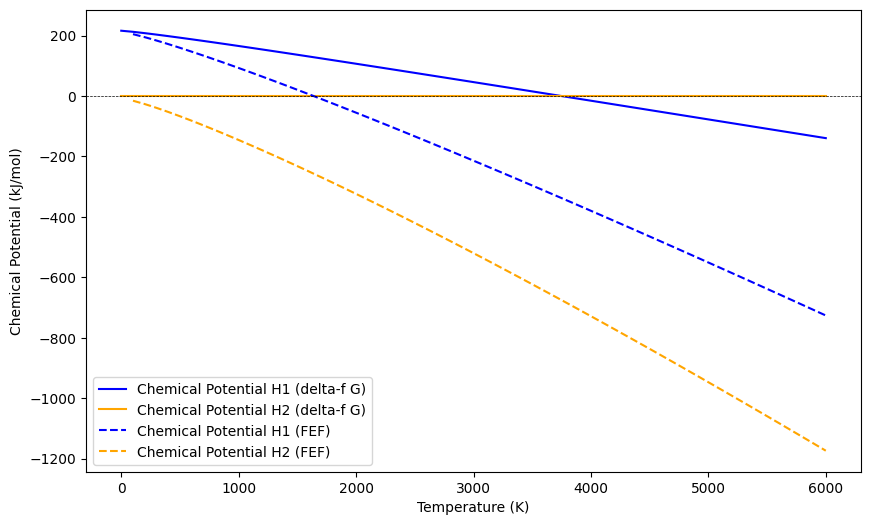

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(T_h_table, mu_h_table, label='Chemical Potential H1 (delta-f G)', color='blue')
plt.plot(T_h2_table, mu_h2_table, label='Chemical Potential H2 (delta-f G)', color='orange')
plt.plot(T_h_table, mu_fef_h_table, label='Chemical Potential H1 (FEF)', linestyle='--', color='blue')
plt.plot(T_h2_table, mu_fef_h2_table, label='Chemical Potential H2 (FEF)', linestyle='--', color='orange')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Chemical Potential (kJ/mol)')
plt.legend()

Multiplying by the stoichiometric coefficients makes the kinship between the two definitions explicit: 
hen you plot 
$2 \mu_H$
and
$\mu_H2$
, the temperature at which the H and H2 curves intersect is identical under both definitions.


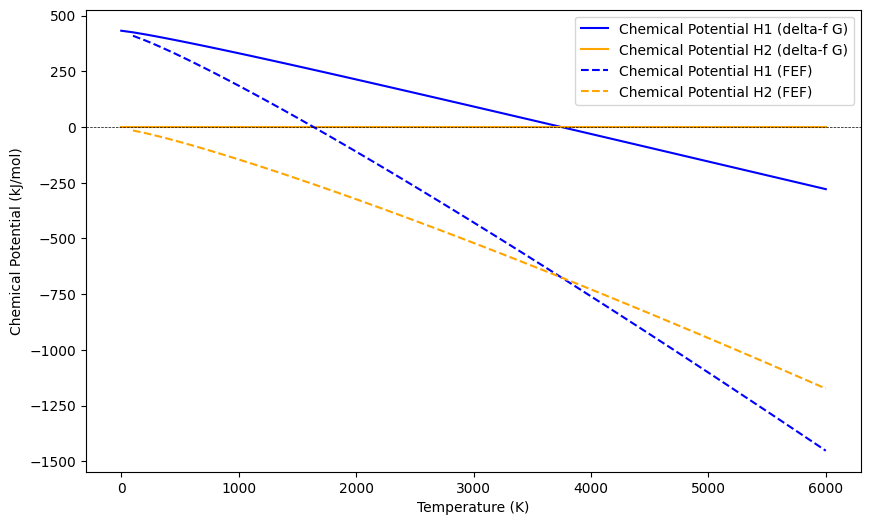

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(T_h_table, 2*mu_h_table, label='Chemical Potential H1 (delta-f G)', color='blue')
plt.plot(T_h2_table, mu_h2_table, label='Chemical Potential H2 (delta-f G)', color='orange')
plt.plot(T_h_table, 2*mu_fef_h_table, label='Chemical Potential H1 (FEF)', linestyle='--', color='blue')
plt.plot(T_h2_table, mu_fef_h2_table, label='Chemical Potential H2 (FEF)', linestyle='--', color='orange')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Chemical Potential (kJ/mol)')
plt.legend()

The standard-state reference species is H₂.
In Definition A, the chemical potential of the standard-state reference species is set to zero at every temperature, so the conversion between the two definitions becomes:

$\mu^\circ_\mathrm{H}(\mathrm{delta-f G}) = \mu^\circ_\mathrm{H} (\mathrm{FEF}) - \frac{1}{2} \mu^\circ_\mathrm{H2} (\mathrm{FEF})$

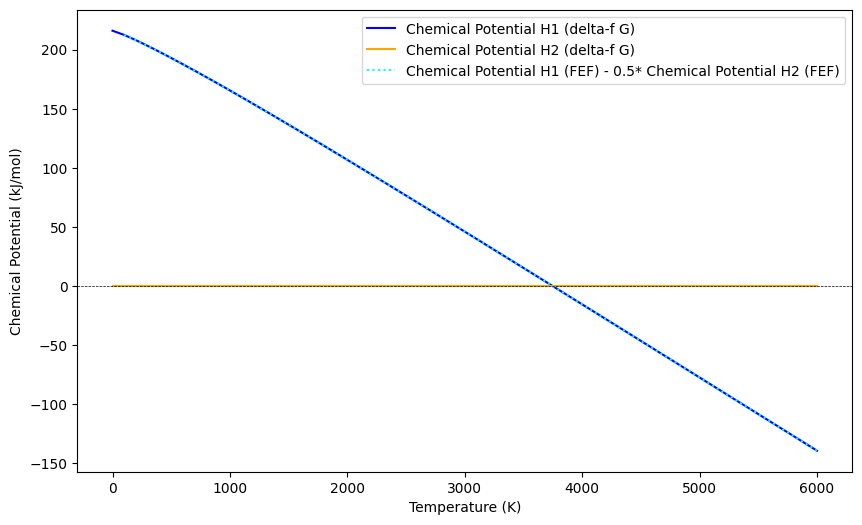

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(T_h_table, mu_h_table, label='Chemical Potential H1 (delta-f G)', color='blue')
plt.plot(T_h2_table, mu_h2_table, label='Chemical Potential H2 (delta-f G)', color='orange')
plt.plot(T_h_table, mu_fef_h_table - 0.5*mu_fef_h2_table, label='Chemical Potential H1 (FEF) - 0.5* Chemical Potential H2 (FEF)', linestyle='dotted', color='cyan')
#plt.plot(T_h2_table, mu_fef_h2_table, label='Chemical Potential H2 (FEF)', linestyle='--', color='orange')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Chemical Potential (kJ/mol)')
plt.legend()

In short:

* **Definition A** sets the chemical potential of the reference species to zero **at every temperature**.
* **Definition B** uses an FEF that by itself carries no reference-species information, yet by adding
  $\Delta H_{f,298}^{\circ}$ it still encodes the convention that the reference species satisfies
  $\Delta H_{f,298}^{\circ}=0$ at 298 K.

Because these offsets are purely relative, they have **no effect on the outcome of Gibbs-energy minimization.**


Let's check this fact using an anlaytic solution for 2 H <-> H2. See tce_two_species.ipynb

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from exogibbs.utils.constants import R_gas_constant_si
from exogibbs.equilibrium.gibbs import interpolate_chemical_potential_one

In [9]:
def mu_h(T, mu_h_table_in):
    return interpolate_chemical_potential_one(T, T_h_table, mu_h_table_in, order=2)


def mu_h2(T, mu_h2_table_in):
    return interpolate_chemical_potential_one(T, T_h2_table, mu_h2_table_in, order=2)


def compute_k(P, T, mu_h_table_in, mu_h2_table_in, Pref=1.0):
    delta_mu = mu_h2(T, mu_h2_table_in) - 2.0 * mu_h(T, mu_h_table_in)
    return np.exp(-delta_mu / R_gas_constant_si) * P / Pref


Tarr = np.linspace(10.0, 6000.0, 300)
Parr = np.logspace(-8.0, 2.0, 300)


def nh(k):
    return 1.0 / np.sqrt(4.0 * k + 1.0)


def nh2(k):
    return 0.5 * (1.0 - nh(k))


def ntotal(k):
    return nh(k) + nh2(k)


def vmr_h(k):
    return nh(k) / ntotal(k)


def vmr_h2(k):
    return nh2(k) / ntotal(k)

Both definitions provide the same results

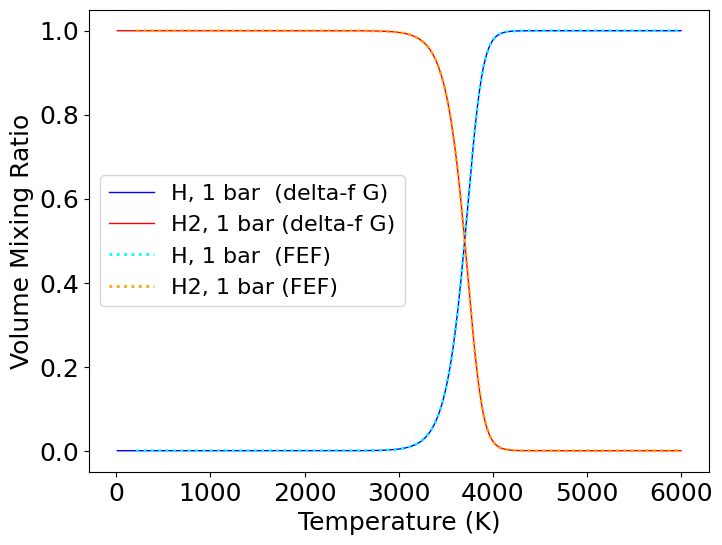

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(Tarr, vmr_h(compute_k(1.0,Tarr, mu_h_table, mu_h2_table)), label='H, 1 bar  (delta-f G)', color='blue', lw=1)
plt.plot(Tarr, vmr_h2(compute_k(1.0,Tarr, mu_h_table, mu_h2_table)), label='H2, 1 bar (delta-f G)', color='red', lw=1)

plt.plot(Tarr, vmr_h(compute_k(1.0,Tarr, mu_fef_h_table, mu_fef_h2_table)), label='H, 1 bar  (FEF)', color='cyan', ls='dotted', lw=2)
plt.plot(Tarr, vmr_h2(compute_k(1.0,Tarr, mu_fef_h_table, mu_fef_h2_table)), label='H2, 1 bar (FEF)', color='orange', ls='dotted', lw=2)


#plt.xscale('log')
#plt.yscale('log')
#plt.gca().invert_xaxis()
plt.tick_params(labelsize=18)
plt.xlabel("Temperature (K)",fontsize=18)
plt.ylabel('Volume Mixing Ratio', fontsize=18)
plt.legend(fontsize=16, loc='center left')
